<a href="https://colab.research.google.com/github/Soyeon-Lee1112/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90_%EC%86%8C%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 살펴보기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
#한글 글씨 폰트 설치

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
df = pd.read_csv("/content/combined_dataset.csv")

In [ ]:
print("✅ 데이터 크기:", df.shape)
print("✅ 컬럼 목록:", df.columns)

✅ 데이터 크기: (11446, 75)
✅ 컬럼 목록: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
     

In [ ]:
# 결측치 개수 확인 (내림차순 정렬)
missing = df.isnull().sum().sort_values(ascending=False)

# 결측치가 있는 컬럼만 출력
missing = missing[missing > 0]

In [ ]:
print("컬럼별 결측치 개수:\n", missing)

컬럼별 결측치 개수:
 license                         11446
calendar_updated                11446
neighbourhood_group_cleansed    11446
neighbourhood                    5783
neighborhood_overview            5783
host_about                       5044
bathrooms                        3403
host_location                    2892
bedrooms                         2342
description                      2170
review_scores_value              1520
review_scores_location           1519
review_scores_accuracy           1519
review_scores_checkin            1519
review_scores_communication      1518
review_scores_cleanliness        1518
last_review                      1497
reviews_per_month                1497
first_review                     1497
review_scores_rating             1495
host_response_rate               1446
host_response_time               1446
host_neighbourhood                916
price                             842
host_acceptance_rate              805
has_availability                  524

In [ ]:
df['host_id'].isnull().sum()

np.int64(0)

In [ ]:
df['id'].isnull().sum()

np.int64(0)

In [ ]:
df_score = df[df['review_scores_rating'].notna()]

In [ ]:
# 결측치 개수 확인 (내림차순 정렬)
missing_s = df_score.isnull().sum().sort_values(ascending=False)

# 결측치가 있는 컬럼만 출력
missing_s = missing_s[missing_s > 0]

In [ ]:
print("컬럼별 결측치 개수:\n", missing_s)

컬럼별 결측치 개수:
 license                         9951
calendar_updated                9951
neighbourhood_group_cleansed    9951
neighbourhood                   4640
neighborhood_overview           4640
host_about                      4124
bathrooms                       2643
host_location                   2270
bedrooms                        1802
description                     1703
host_response_rate              1031
host_response_time              1031
host_neighbourhood               739
price                            731
host_acceptance_rate             486
has_availability                 440
beds                             317
host_is_superhost                199
review_scores_value               25
review_scores_accuracy            24
review_scores_location            24
review_scores_checkin             24
review_scores_cleanliness         23
review_scores_communication       23
bathrooms_text                    16
reviews_per_month                  2
first_review             

In [ ]:
df_score.loc[df_score['review_scores_value'].isna(),['review_scores_value','number_of_reviews']]

,review_scores_value,number_of_reviews
6469,NaN,1
7245,NaN,1
7619,NaN,1
7853,NaN,2
7917,NaN,1
7953,NaN,1
8028,NaN,1
8100,NaN,2
8106,NaN,1
8118,NaN,1


In [ ]:
df['number_of_reviews'].mean()

np.float64(59.95885025336362)

In [ ]:
df['number_of_reviews'].median()

18.0

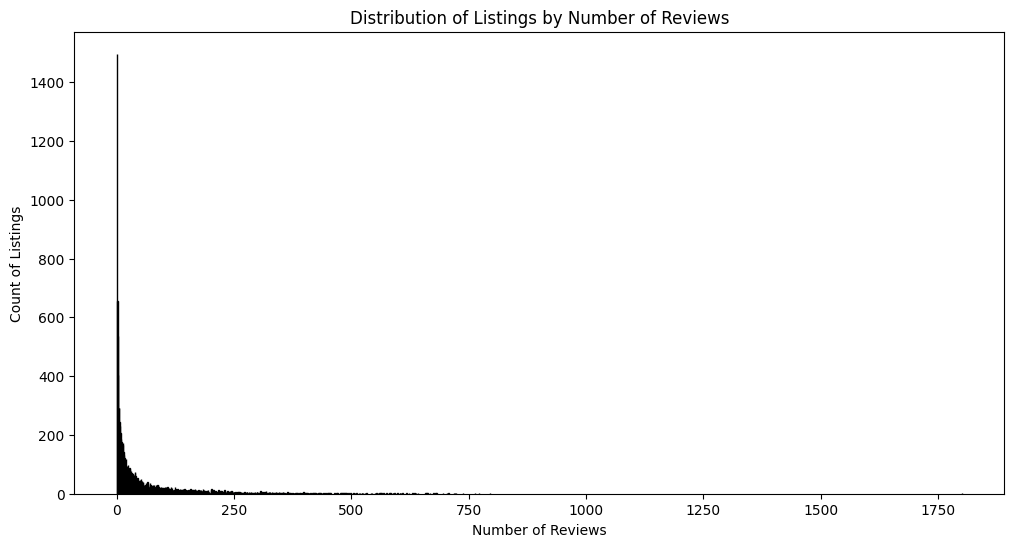

In [ ]:
review_counts = df['number_of_reviews'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12,6))
plt.bar(review_counts.index, review_counts.values, edgecolor='black')
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listings by Number of Reviews")
plt.show()

In [ ]:
review_counts

,count
number_of_reviews,
0,1497
1,654
2,536
3,403
4,293
...,...
738,1
763,1
772,1


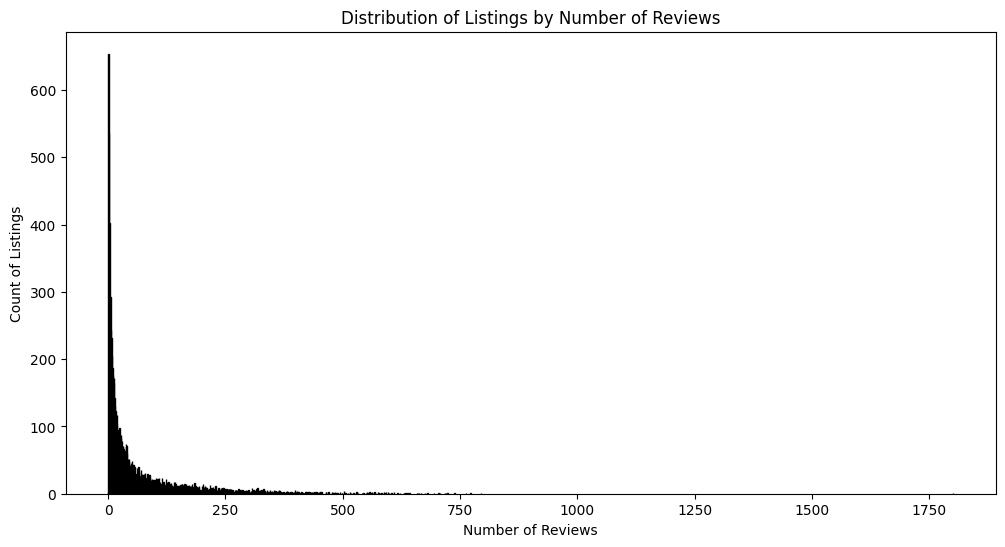

In [ ]:
review_counts_s = df_score['number_of_reviews'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12,6))
plt.bar(review_counts_s.index, review_counts_s.values, edgecolor='black' )
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listings by Number of Reviews")
plt.show()

In [ ]:
review_counts_s

,count
number_of_reviews,
0,2
1,654
2,536
3,403
4,293
...,...
738,1
763,1
772,1


In [ ]:
df_score['number_of_reviews'].describe()

,number_of_reviews
count,9951.000000
mean,68.966838
std,103.890761
min,0.000000
25%,7.000000
50%,26.000000
75%,86.000000
max,1801.000000


In [ ]:
df['last_scraped']

,last_scraped
0,2024-03-25
1,2024-03-25
2,2024-03-25
3,2024-03-25
4,2024-03-25
...,...
11441,2023-09-17
11442,2023-09-17
11443,2023-09-17
11444,2023-09-17


# 시각화

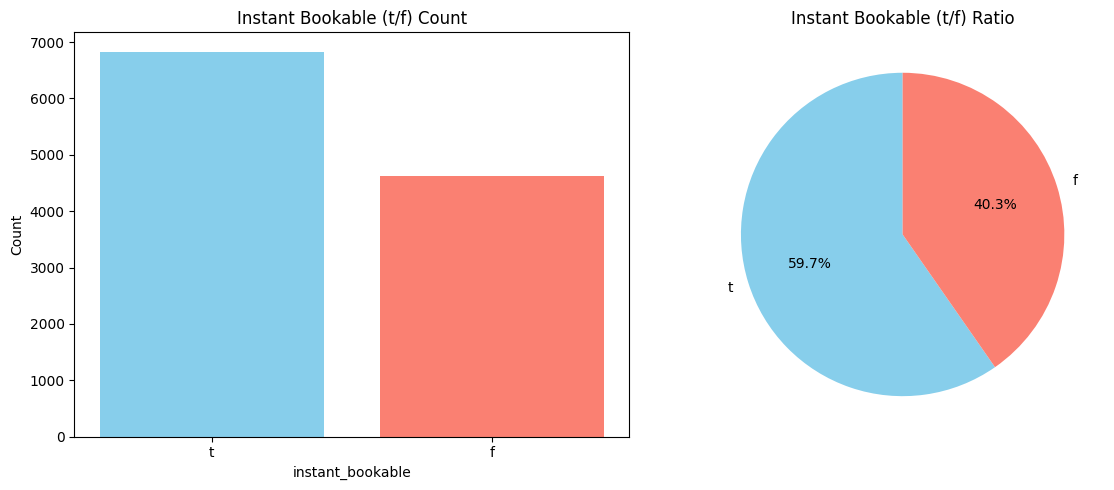

Instant Bookable 분포:
instant_bookable
t    6831
f    4615
Name: count, dtype: int64

비율(%):
instant_bookable
t    59.68
f    40.32
Name: count, dtype: float64


In [ ]:
# instant_bookable 값 집계
counts = df['instant_bookable'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대그래프
axes[0].bar(counts.index, counts.values, color=["skyblue", "salmon"])
axes[0].set_title("Instant Bookable (t/f) Count")
axes[0].set_xlabel("instant_bookable")
axes[0].set_ylabel("Count")

# 파이차트
axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
axes[1].set_title("Instant Bookable (t/f) Ratio")

plt.tight_layout()
plt.show()

# 비율 텍스트 출력
print("Instant Bookable 분포:")
print(counts)
print("\n비율(%):")
print((counts / counts.sum() * 100).round(2))

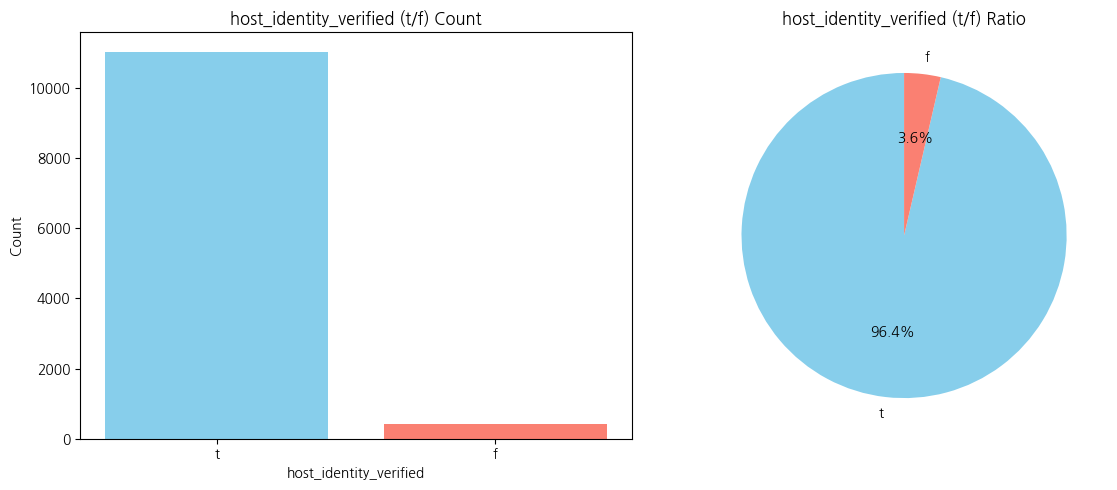

host_identity_verified 분포:
host_identity_verified
t    11031
f      415
Name: count, dtype: int64

비율(%):
host_identity_verified
t    96.37
f     3.63
Name: count, dtype: float64


In [ ]:
#host_identity_verified 값 집계
counts = df['host_identity_verified'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 막대그래프
axes[0].bar(counts.index, counts.values, color=["skyblue", "salmon"])
axes[0].set_title("host_identity_verified (t/f) Count")
axes[0].set_xlabel("host_identity_verified")
axes[0].set_ylabel("Count")

# 파이차트
axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
axes[1].set_title("host_identity_verified (t/f) Ratio")

plt.tight_layout()
plt.show()

# 비율 텍스트 출력
print("host_identity_verified 분포:")
print(counts)
print("\n비율(%):")
print((counts / counts.sum() * 100).round(2))

instant_bookable 별 host_identity_verified 비율(%)
host_identity_verified     f      t
instant_bookable                   
f                       7.37  92.63
t                       1.10  98.90


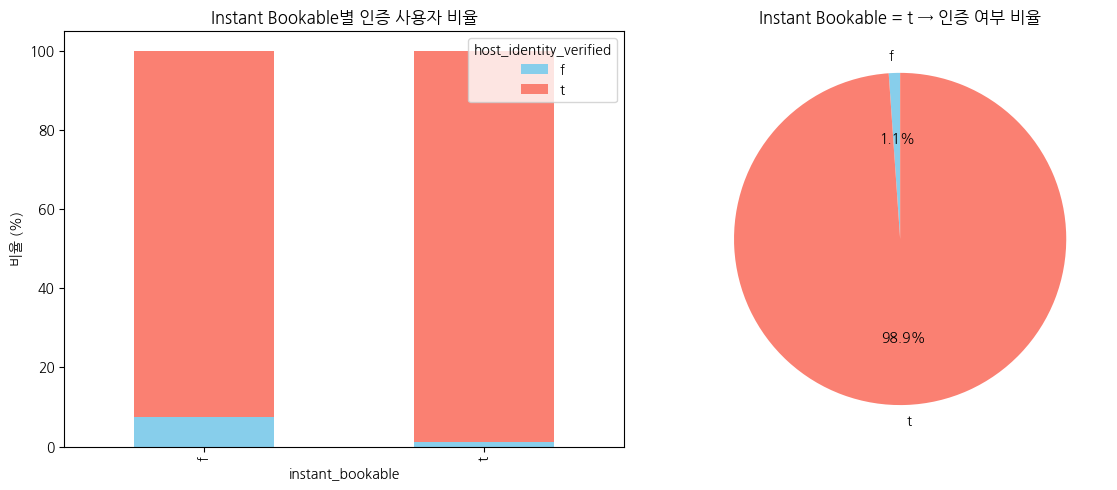

In [ ]:
# instant_bookable(t/f)과 host_identity_verified(t/f) 교차 집계
cross_tab = pd.crosstab(df['instant_bookable'], df['host_identity_verified'])

# 비율(%) 계산
cross_tab_ratio = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# 표 출력
print("instant_bookable 별 host_identity_verified 비율(%)")
print(cross_tab_ratio.round(2))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1) 막대그래프 (비율 stacked bar)
cross_tab_ratio.plot(kind='bar', stacked=True, ax=axes[0], color=["skyblue", "salmon"])
axes[0].set_title("Instant Bookable별 인증 사용자 비율")
axes[0].set_ylabel("비율 (%)")
axes[0].legend(title="host_identity_verified")

# 2) f/t 각각 파이차트
cross_tab_ratio.loc['t'].plot(
    kind='pie', autopct='%1.1f%%', ax=axes[1], startangle=90, colors=["skyblue","salmon"]
)
axes[1].set_ylabel("")
axes[1].set_title("Instant Bookable = t → 인증 여부 비율")

plt.tight_layout()
plt.show()


=== 건수(Counts) ===
trusted_host      not_trusted  trusted
instant_bookable                      
f                          18     4597
t                           7     6824

=== 비율(%) by instant_bookable ===
trusted_host      not_trusted  trusted
instant_bookable                      
f                        0.39    99.61
t                        0.10    99.90


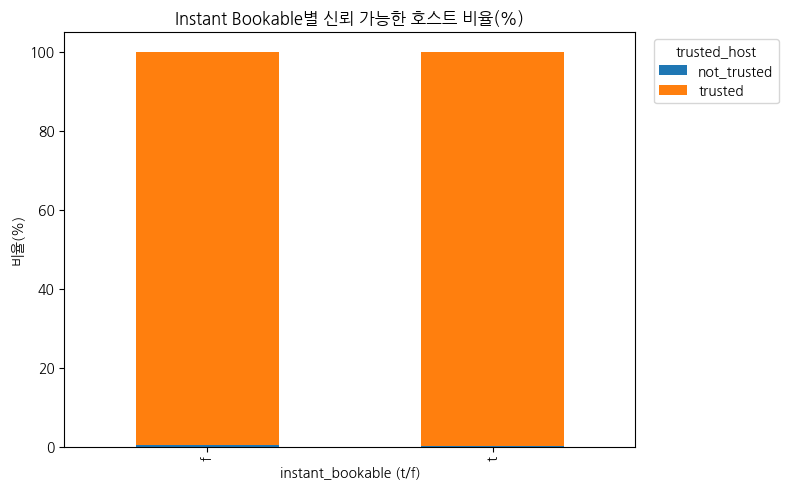

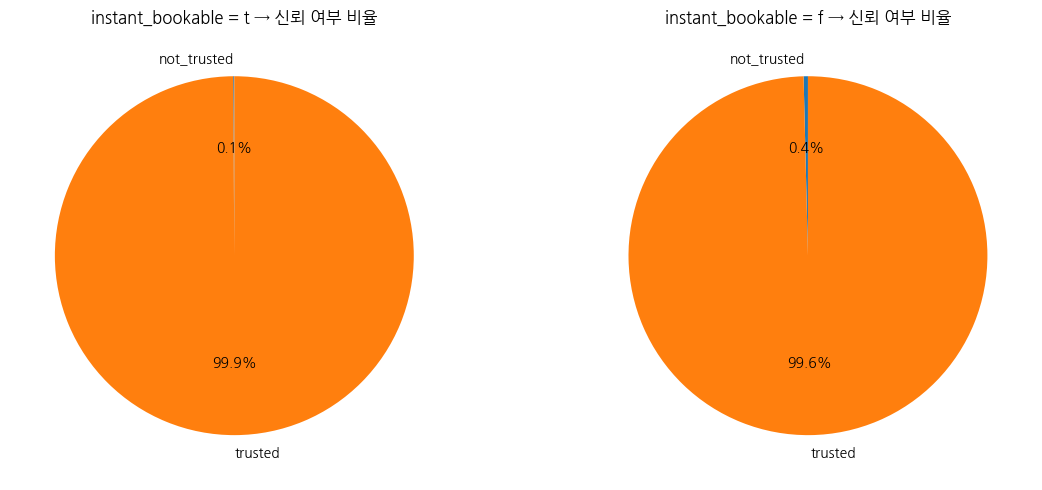


[참고] 사진 판정에 사용한 컬럼: host_has_profile_pic
[참고] 신원 인증 컬럼(host_identity_verified) 사용 여부: True


In [ ]:
def to_bool(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, bool):
        return x
    s = str(x).strip().lower()
    if s in {'t', 'true', '1', 'y', 'yes'}:
        return True
    if s in {'f', 'false', '0', 'n', 'no'}:
        return False
    return np.nan  # 기타는 결측으로 처리

# === 4) 주요 컬럼 정규화 ===
# instant_bookable은 그대로 쓰되, 결측/기타는 제외
if 'instant_bookable' not in df.columns:
    raise ValueError("데이터에 'instant_bookable' 컬럼이 없습니다.")

# 신원 인증 여부
id_col = 'host_identity_verified' if 'host_identity_verified' in df.columns else None
id_bool = df[id_col].map(to_bool) if id_col else pd.Series([np.nan]*len(df))

# 사진 여부 자동 탐지
photo_bool = pd.Series([np.nan]*len(df))
if 'host_has_profile_pic' in df.columns:
    photo_bool = df['host_has_profile_pic'].map(to_bool)
elif 'host_picture_url' in df.columns:
    # 비어있지 않은 URL이면 사진 있음
    photo_bool = df['host_picture_url'].astype(str).str.strip().replace({'nan': ''})
    photo_bool = photo_bool.apply(lambda s: bool(s))
elif 'host_profile_photo' in df.columns:
    photo_bool = df['host_profile_photo'].astype(str).str.strip().replace({'nan': ''})
    photo_bool = photo_bool.apply(lambda s: bool(s))
elif 'host_profile_pic' in df.columns:
    photo_bool = df['host_profile_pic'].astype(str).str.strip().replace({'nan': ''})
    photo_bool = photo_bool.apply(lambda s: bool(s))
# (필요하면 위에 후보 컬럼을 추가로 늘릴 수 있음)

# === 5) trusted 호스트 정의 ===
trusted = (id_bool.fillna(False) | photo_bool.fillna(False))

# 결측/기타 instant_bookable 값은 제외
df_valid = df[~df['instant_bookable'].isna()].copy()
trusted_valid = trusted.loc[df_valid.index]

# trusted 라벨 생성
df_valid['trusted_host'] = np.where(trusted_valid, 'trusted', 'not_trusted')

# === 6) 교차 집계 (instant_bookable x trusted_host) ===
cross_counts = pd.crosstab(df_valid['instant_bookable'], df_valid['trusted_host'])
cross_ratio = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

print("=== 건수(Counts) ===")
print(cross_counts)
print("\n=== 비율(%) by instant_bookable ===")
print(cross_ratio.round(2))

# === 7) 시각화 ===
# (1) stacked bar - t/f 각각에서 trusted vs not_trusted 비율
ax = cross_ratio.plot(kind='bar', stacked=True, figsize=(8, 5))
ax.set_title("Instant Bookable별 신뢰 가능한 호스트 비율(%)")
ax.set_xlabel("instant_bookable (t/f)")
ax.set_ylabel("비율(%)")
ax.legend(title="trusted_host", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# (2) t와 f 각각 파이차트
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, key in enumerate(['t', 'f']):
    if key in cross_ratio.index:
        axes[i].pie(
            cross_ratio.loc[key].values,
            labels=cross_ratio.columns,
            autopct='%1.1f%%',
            startangle=90
        )
        axes[i].set_title(f"instant_bookable = {key} → 신뢰 여부 비율")
    else:
        axes[i].text(0.5, 0.5, f"'{key}' 데이터 없음", ha='center', va='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# === 8) 참고: 현재 어떤 컬럼이 사진 판정에 쓰였는지 알려주기 ===
photo_source = (
    'host_has_profile_pic' if 'host_has_profile_pic' in df.columns else
    'host_picture_url' if 'host_picture_url' in df.columns else
    'host_profile_photo' if 'host_profile_photo' in df.columns else
    'host_profile_pic' if 'host_profile_pic' in df.columns else
    None
)
print("\n[참고] 사진 판정에 사용한 컬럼:", photo_source)
print("[참고] 신원 인증 컬럼(host_identity_verified) 사용 여부:", bool(id_col))

 28%|██▊       | 3167/11446 [07:56<14:01,  9.84it/s]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 11446/11446 [30:53<00:00,  6.17it/s]


=== 건수(Counts) ===
trusted_host_faceaware  not_trusted  trusted
instant_bookable                            
f                               215     4400
t                                46     6785

=== 비율(%) by instant_bookable (face-aware trusted) ===
trusted_host_faceaware  not_trusted  trusted
instant_bookable                            
f                              4.66    95.34
t                              0.67    99.33


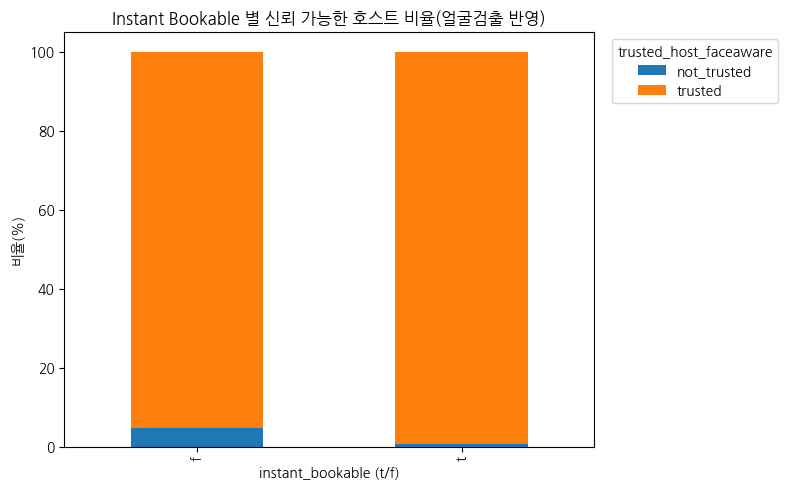

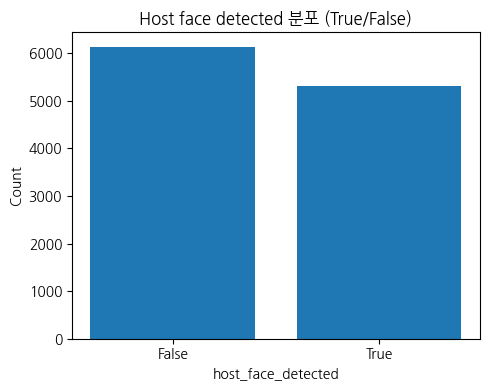


[참고] 프로필 사진 URL 컬럼: host_picture_url
[참고] 신원 인증 컬럼 사용 여부: True


In [ ]:
# =========================================================
# 0) 설치 (처음 한 번만)
# =========================================================
!pip -q install opencv-python-headless tqdm

# =========================================================
# 1) 라이브러리 & 업로드
# =========================================================
import pandas as pd
import numpy as np
import cv2
import io, os, re, time, requests
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

from google.colab import files
df = pd.read_csv('combined_dataset.csv')

# =========================================================
# 2) 유틸: t/f/True/False/1/0 문자열 -> bool
# =========================================================
def to_bool(x):
    if pd.isna(x): return np.nan
    if isinstance(x, bool): return x
    s = str(x).strip().lower()
    if s in {'t','true','1','y','yes'}: return True
    if s in {'f','false','0','n','no'}: return False
    return np.nan

# =========================================================
# 3) 주요 컬럼 확인
#    - 사진 URL 후보: host_picture_url > host_profile_photo > host_profile_pic
# =========================================================
photo_url_col = None
for c in ['host_picture_url','host_profile_photo','host_profile_pic']:
    if c in df.columns:
        photo_url_col = c
        break

if photo_url_col is None:
    raise ValueError("프로필 사진 URL 컬럼을 찾지 못했습니다. (예: host_picture_url) 컬럼명을 알려주세요!")

id_col = 'host_identity_verified' if 'host_identity_verified' in df.columns else None
inst_col = 'instant_bookable' if 'instant_bookable' in df.columns else None
if inst_col is None:
    raise ValueError("데이터에 'instant_bookable' 컬럼이 없습니다.")

# =========================================================
# 4) 얼굴 검출기 준비 (OpenCV Haar Cascade)
# =========================================================
# Colab의 OpenCV에는 haarcascade 경로가 포함되어 있음
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

def detect_face_pil(pil_img, min_size=(30,30), scaleFactor=1.1, minNeighbors=5):
    """PIL 이미지에서 얼굴 유무(True/False) 검출"""
    try:
        img = np.array(pil_img.convert('RGB'))  # PIL -> RGB ndarray
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray,
                                              scaleFactor=scaleFactor,
                                              minNeighbors=minNeighbors,
                                              minSize=min_size)
        return len(faces) > 0
    except Exception:
        return False

# =========================================================
# 5) 이미지 다운로드 & 얼굴 검출
#    - 실패/만료/비이미지 MIME type은 False 처리
#    - 중복 URL 캐시로 속도 개선
#    - 빠른 테스트는 MAX_IMAGES_PERFORM = 500 같은 제한 사용
# =========================================================
SESSION = requests.Session()
SESSION.headers.update({
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
})

def fetch_image(url, timeout=10):
    r = SESSION.get(url, stream=True, timeout=timeout)
    ct = r.headers.get('Content-Type','').lower()
    if 'image' not in ct:
        raise ValueError(f"Not an image content-type: {ct}")
    content = r.content
    return Image.open(io.BytesIO(content))

# 중복 URL 캐시
url_face_cache = {}

# 너무 큰 데이터면 샘플 먼저 시험 (원하면 None으로 전체 처리)
MAX_IMAGES_PERFORM = None  # 예: 500  (None이면 전체 처리)

urls = df[photo_url_col].astype(str).str.strip()
# 'nan', '' 제거
urls = urls.replace({'nan':''})
targets = urls[urls!='']

if MAX_IMAGES_PERFORM is not None and len(targets) > MAX_IMAGES_PERFORM:
    print(f"[안내] URL {len(targets)}개 중 {MAX_IMAGES_PERFORM}개만 우선 처리합니다 (속도 확인용).")
    targets = targets.sample(MAX_IMAGES_PERFORM, random_state=42)

# 결과 시리즈 초기화
host_face_detected = pd.Series(False, index=df.index)

for idx, url in tqdm(targets.items(), total=len(targets)):
    # 캐시 확인
    if url in url_face_cache:
        host_face_detected.iloc[idx] = url_face_cache[url]
        continue

    ok = False
    try:
        img = fetch_image(url, timeout=10)
        # 너무 큰 이미지는 축소(성능/속도)
        max_side = max(img.size)
        if max_side > 800:
            scale = 800.0 / max_side
            new_size = (int(img.size[0]*scale), int(img.size[1]*scale))
            img = img.resize(new_size)
        ok = detect_face_pil(img)
    except Exception as e:
        ok = False  # 다운로드 실패/비이미지/파싱 오류 등은 False

    url_face_cache[url] = ok
    host_face_detected.iloc[idx] = ok

df['host_face_detected'] = host_face_detected

# =========================================================
# 6) "신뢰 가능한 호스트" 재정의
#    trusted_faceaware = (host_identity_verified == t/True) OR (host_face_detected == True)
# =========================================================
if id_col:
    id_bool = df[id_col].map(to_bool)
else:
    id_bool = pd.Series([False]*len(df))

trusted_faceaware = (id_bool.fillna(False) | df['host_face_detected'].fillna(False))
df['trusted_host_faceaware'] = np.where(trusted_faceaware, 'trusted', 'not_trusted')

# =========================================================
# 7) instant_bookable (t/f)별로 trusted 비율 비교
# =========================================================
valid = df[~df[inst_col].isna()].copy()

# t/f 통일 (문자 혼재 대비)
valid[inst_col] = valid[inst_col].astype(str).str.strip().str.lower().map({'t':'t','true':'t','1':'t','f':'f','false':'f','0':'f'}).fillna(valid[inst_col])

cross_counts = pd.crosstab(valid[inst_col], valid['trusted_host_faceaware'])
cross_ratio  = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

print("=== 건수(Counts) ===")
print(cross_counts)
print("\n=== 비율(%) by instant_bookable (face-aware trusted) ===")
print(cross_ratio.round(2))

# 시각화 (stacked bar)
ax = cross_ratio.plot(kind='bar', stacked=True, figsize=(8,5))
ax.set_title("Instant Bookable 별 신뢰 가능한 호스트 비율(얼굴검출 반영)")
ax.set_xlabel("instant_bookable (t/f)")
ax.set_ylabel("비율(%)")
ax.legend(title="trusted_host_faceaware", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 보너스: 얼굴검출 자체 분포
face_counts = df['host_face_detected'].value_counts(dropna=False)
plt.figure(figsize=(5,4))
plt.bar(face_counts.index.astype(str), face_counts.values)
plt.title("Host face detected 분포 (True/False)")
plt.xlabel("host_face_detected")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 어떤 URL 컬럼을 썼는지 안내
print("\n[참고] 프로필 사진 URL 컬럼:", photo_url_col)
print("[참고] 신원 인증 컬럼 사용 여부:", bool(id_col))


 28%|██▊       | 3170/11446 [02:08<03:25, 40.18it/s]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 11446/11446 [08:36<00:00, 22.15it/s]


=== 건수(Counts) ===
trusted_host            not_trusted  trusted
instant_bookable_clean                      
f                               217     4398
t                                46     6785

=== 비율(%) by instant_bookable ===
trusted_host            not_trusted  trusted
instant_bookable_clean                      
f                              4.70    95.30
t                              0.67    99.33


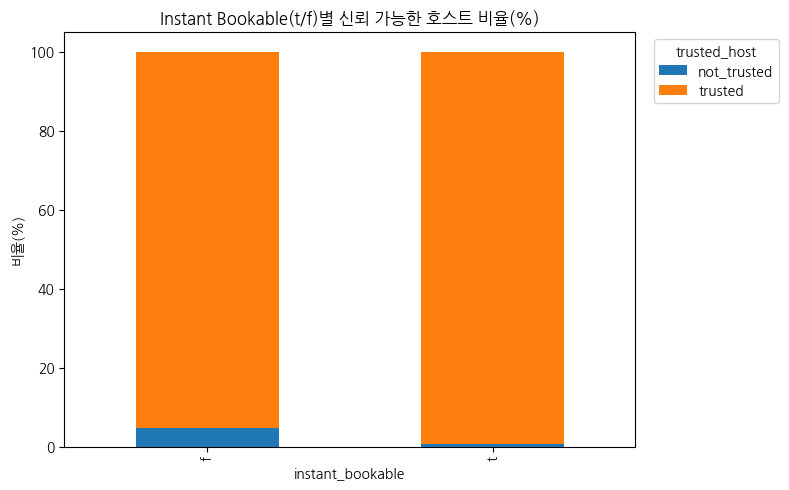

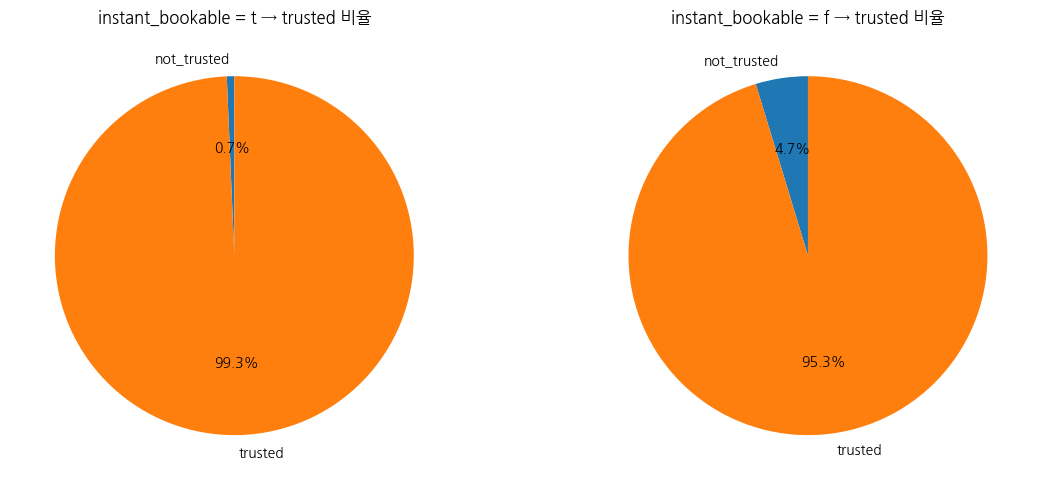


[참고] 사용한 URL 컬럼: host_picture_url
[참고] 신원 인증 컬럼 존재 여부: True
[참고] 얼굴 검출 True 개수: 5193


In [ ]:
# =========================================================
# 0) (최초 1회) 설치
# =========================================================
!pip -q install opencv-python-headless tqdm

# =========================================================
# 1) 라이브러리 & 데이터 업로드
# =========================================================
import pandas as pd
import numpy as np
import cv2, io, requests
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

from google.colab import files
df = pd.read_csv('combined_dataset.csv')

# =========================================================
# 2) 유틸: t/f/True/False/1/0 문자열 → bool
# =========================================================
def to_bool(x):
    if pd.isna(x): return np.nan
    if isinstance(x, bool): return x
    s = str(x).strip().lower()
    if s in {'t','true','1','y','yes'}: return True
    if s in {'f','false','0','n','no'}: return False
    return np.nan

# =========================================================
# 3) 주요 컬럼 확인
# =========================================================
# instant_bookable
if 'instant_bookable' not in df.columns:
    raise ValueError("데이터에 'instant_bookable' 컬럼이 없습니다.")

# host_identity_verified (없으면 False로 대체)
id_col = 'host_identity_verified' if 'host_identity_verified' in df.columns else None
id_bool = df[id_col].map(to_bool) if id_col else pd.Series([False]*len(df))

# 프로필 사진 URL 컬럼 자동 탐지
photo_url_col = None
for c in ['host_picture_url','host_profile_photo','host_profile_pic']:
    if c in df.columns:
        photo_url_col = c
        break
if photo_url_col is None:
    print("[안내] 프로필 사진 URL 컬럼을 찾지 못했습니다. 얼굴 검출 없이 인증만으로 trusted를 판단합니다.")

# =========================================================
# 4) 얼굴 검출 준비 (OpenCV Haar Cascade)
# =========================================================
def detect_face_pil(pil_img, min_size=(30,30), scaleFactor=1.1, minNeighbors=6):
    try:
        import numpy as np
        img = np.array(pil_img.convert('RGB'))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray,
                                              scaleFactor=scaleFactor,
                                              minNeighbors=minNeighbors,
                                              minSize=min_size)
        return len(faces) > 0
    except Exception:
        return False

host_face_detected = pd.Series(False, index=df.index)

if photo_url_col:
    cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)

    SESSION = requests.Session()
    SESSION.headers.update({
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                      "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    })

    def fetch_image(url, timeout=10):
        r = SESSION.get(url, stream=True, timeout=timeout)
        ct = r.headers.get('Content-Type','').lower()
        if 'image' not in ct:
            raise ValueError(f"Not an image: {ct}")
        return Image.open(io.BytesIO(r.content))

    url_face_cache = {}
    urls = df[photo_url_col].astype(str).str.strip().replace({'nan':''})
    targets = urls[urls!='']

    # 필요시 일부만 테스트하려면 숫자 지정 (예: 500). 전체는 None.
    MAX_IMAGES = None

    if MAX_IMAGES is not None and len(targets) > MAX_IMAGES:
        print(f"[안내] URL {len(targets)}개 중 {MAX_IMAGES}개만 우선 처리합니다.")
        targets = targets.sample(MAX_IMAGES, random_state=42)

    for idx, url in tqdm(targets.items(), total=len(targets)):
        if url in url_face_cache:
            host_face_detected.iloc[idx] = url_face_cache[url]
            continue
        ok = False
        try:
            img = fetch_image(url, timeout=10)
            # 너무 큰 이미지는 축소(성능/속도)
            max_side = max(img.size)
            if max_side > 800:
                scale = 800.0 / max_side
                img = img.resize((int(img.size[0]*scale), int(img.size[1]*scale)))
            ok = detect_face_pil(img)
        except Exception:
            ok = False
        url_face_cache[url] = ok
        host_face_detected.iloc[idx] = ok

df['host_face_detected'] = host_face_detected if photo_url_col else False

# =========================================================
# 5) "신뢰 가능한 호스트" 정의 (요청 기준)
#    trusted = (host_identity_verified == True/t) OR (host_face_detected == True)
# =========================================================
trusted = (id_bool.fillna(False) | df['host_face_detected'].fillna(False))
df['trusted_host'] = np.where(trusted, 'trusted', 'not_trusted')

# instant_bookable 값 정리(t/f 매핑)
inst = df['instant_bookable'].astype(str).str.strip().str.lower().map({
    't':'t','true':'t','1':'t',
    'f':'f','false':'f','0':'f'
}).fillna(df['instant_bookable'].astype(str).str.strip().str.lower())
valid = df[inst.isin(['t','f'])].copy()
valid['instant_bookable_clean'] = inst[valid.index]

# =========================================================
# 6) 교차 집계 & 비율
# =========================================================
cross_counts = pd.crosstab(valid['instant_bookable_clean'], valid['trusted_host'])
cross_ratio  = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

print("=== 건수(Counts) ===")
print(cross_counts)
print("\n=== 비율(%) by instant_bookable ===")
print(cross_ratio.round(2))

# =========================================================
# 7) 시각화
# =========================================================
ax = cross_ratio.plot(kind='bar', stacked=True, figsize=(8,5))
ax.set_title("Instant Bookable(t/f)별 신뢰 가능한 호스트 비율(%)")
ax.set_xlabel("instant_bookable")
ax.set_ylabel("비율(%)")
ax.legend(title="trusted_host", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# t/f 각각 파이차트
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for i, key in enumerate(['t','f']):
    if key in cross_ratio.index:
        axes[i].pie(cross_ratio.loc[key].values,
                    labels=cross_ratio.columns,
                    autopct='%1.1f%%',
                    startangle=90)
        axes[i].set_title(f"instant_bookable = {key} → trusted 비율")
    else:
        axes[i].text(0.5,0.5,f"'{key}' 데이터 없음", ha='center', va='center')
        axes[i].axis('off')
plt.tight_layout()
plt.show()

# 참고 정보
print("\n[참고] 사용한 URL 컬럼:", photo_url_col)
print("[참고] 신원 인증 컬럼 존재 여부:", bool(id_col))
print("[참고] 얼굴 검출 True 개수:", int(df['host_face_detected'].sum()))


In [ ]:
df['review_scores_location']

,review_scores_location
0,4.93
1,4.97
2,4.93
3,4.94
4,4.90
...,...
11441,NaN
11442,NaN
11443,NaN
11444,NaN


=== reviews_per_month 통계 ===
                  count      mean  median       std
instant_bookable                                   
f                  3876  1.534420    0.93  1.676782
t                  6073  2.217635    1.73  1.981678

=== t-test 결과 ===
t-statistic: 18.4449, p-value: 0.0000


/tmp/ipython-input-2923465525.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(t_group, label="Instant Bookable (t)", shade=True)
/tmp/ipython-input-2923465525.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f_group, label="Need Approval (f)", shade=True)


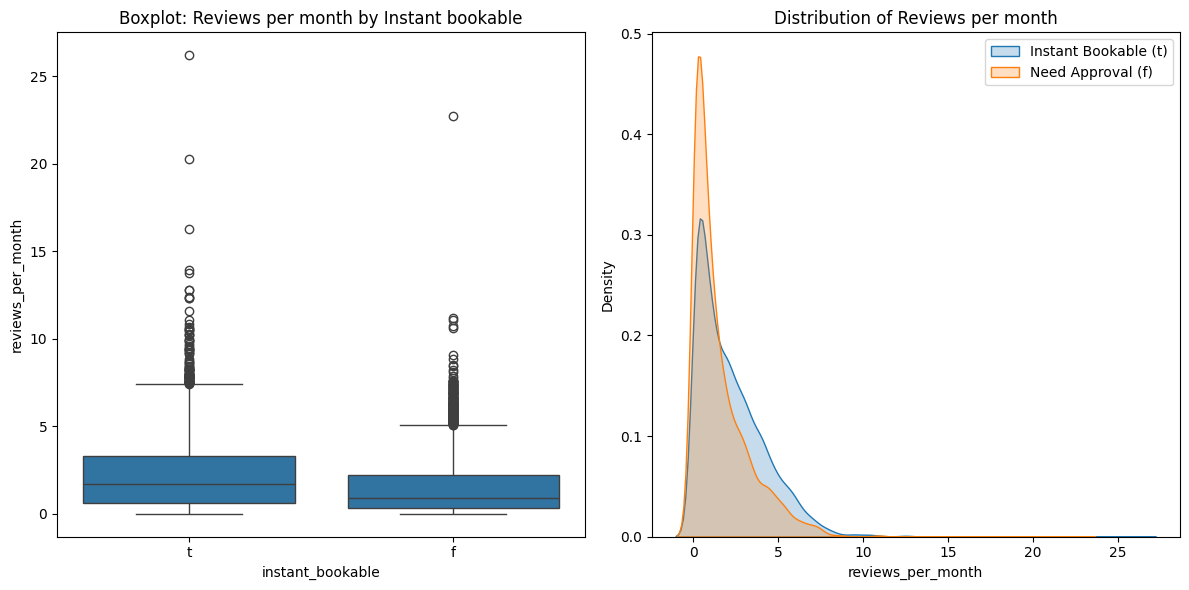

In [ ]:
# instant_bookable별 reviews_per_month 기초통계
summary = df.groupby("instant_bookable")["reviews_per_month"].agg(["count","mean","median","std"])
print("=== reviews_per_month 통계 ===")
print(summary)

# 두 그룹 나누기
t_group = df[df["instant_bookable"] == "t"]["reviews_per_month"].dropna()
f_group = df[df["instant_bookable"] == "f"]["reviews_per_month"].dropna()

# t-test
t_stat, p_val = stats.ttest_ind(t_group, f_group, equal_var=False)
print("\n=== t-test 결과 ===")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

# 시각화
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x="instant_bookable", y="reviews_per_month", data=df)
plt.title("Boxplot: Reviews per month by Instant bookable")

plt.subplot(1,2,2)
sns.kdeplot(t_group, label="Instant Bookable (t)", shade=True)
sns.kdeplot(f_group, label="Need Approval (f)", shade=True)
plt.title("Distribution of Reviews per month")
plt.legend()

plt.tight_layout()
plt.show()


원본 행수: 11,446  ->  신원인증 호스트+결측제외 후: 9,669

=== 신원 인증 호스트만: reviews_per_month 통계 ===
                                   count    mean  median     std
instant_bookable (t=즉시예약, f=승인필요)                               
f                                   3657  1.5937    1.00  1.6943
t                                   6012  2.2215    1.73  1.9839

=== Welch t-test (신원 인증 호스트만) ===
t-statistic: 16.5457, p-value: 0.000000
Hedges' g (|0.2|=작음, |0.5|=중간, |0.8|=큼): 0.334


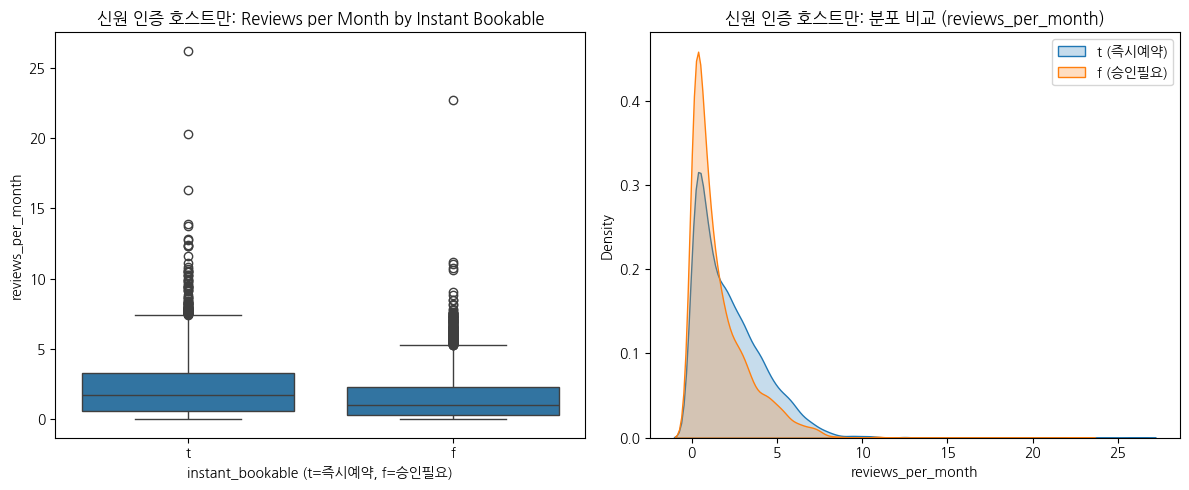

In [ ]:
# 코랩/파이썬용 코드: host_identity_verified == "t" 인 호스트만 대상으로 비교
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# ===== 0) 데이터 로드 =====
df = pd.read_csv("/content/combined_dataset.csv")

# ===== 1) 표준화 =====
def to_bool_like(s):
    return s.astype(str).str.strip().str.lower().isin(["t","true","1","yes","y"])

df["instant_bookable_std"]   = np.where(to_bool_like(df["instant_bookable"]), "t", "f")
df["host_identity_verified"] = to_bool_like(df["host_identity_verified"])

# ===== 2) host_identity_verified == True (즉, 't') 인 호스트만 필터 =====
dft = df.loc[
    (df["host_identity_verified"]) &
    (df["reviews_per_month"].notna()) &
    (df["instant_bookable_std"].notna())
].copy()

print(f"원본 행수: {len(df):,}  ->  신원인증 호스트+결측제외 후: {len(dft):,}")

# ===== 3) 기술통계 =====
summary = (dft
           .groupby("instant_bookable_std")["reviews_per_month"]
           .agg(count="count", mean="mean", median="median", std="std")
          )
summary.index = summary.index.rename("instant_bookable (t=즉시예약, f=승인필요)")
print("\n=== 신원 인증 호스트만: reviews_per_month 통계 ===")
print(summary.round(4))

# 그룹 분리
t_group = dft.loc[dft["instant_bookable_std"]=="t", "reviews_per_month"]
f_group = dft.loc[dft["instant_bookable_std"]=="f", "reviews_per_month"]

# ===== 4) 통계검정 (Welch t-test) =====
t_stat, p_val = stats.ttest_ind(t_group, f_group, equal_var=False, nan_policy="omit")
print("\n=== Welch t-test (신원 인증 호스트만) ===")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")

# ===== 5) 효과크기 (Cohen's d/Hedges' g) =====
def hedges_g(x, y):
    x = np.asarray(x.dropna())
    y = np.asarray(y.dropna())
    nx, ny = len(x), len(y)
    sx2, sy2 = x.var(ddof=1), y.var(ddof=1)
    s_pooled = np.sqrt(((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2))
    d = (x.mean() - y.mean()) / s_pooled
    J = 1 - (3/(4*(nx+ny)-9))  # small sample correction
    return d*J

g = hedges_g(t_group, f_group)
print(f"Hedges' g (|0.2|=작음, |0.5|=중간, |0.8|=큼): {g:.3f}")

# ===== 6) 시각화 =====
plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(data=dft, x="instant_bookable_std", y="reviews_per_month")
plt.title("신원 인증 호스트만: Reviews per Month by Instant Bookable")
plt.xlabel("instant_bookable (t=즉시예약, f=승인필요)")
plt.ylabel("reviews_per_month")

# KDE
plt.subplot(1,2,2)
sns.kdeplot(t_group, label="t (즉시예약)", fill=True)
sns.kdeplot(f_group, label="f (승인필요)", fill=True)
plt.title("신원 인증 호스트만: 분포 비교 (reviews_per_month)")
plt.xlabel("reviews_per_month")
plt.legend()

plt.tight_layout()
plt.show()


=== 승인 필요 숙소 비교 ===
            count    mean  median     std
group                                    
승인필요(전체)      219  0.5437    0.21  0.8897
승인필요+인증호스트   3657  1.5937    1.00  1.6943

=== Welch t-test (승인필요 vs 승인필요+인증호스트) ===
t-statistic: -15.8309, p-value: 0.000000
Hedges' g (|0.2|=작음, |0.5|=중간, |0.8|=큼): -0.633


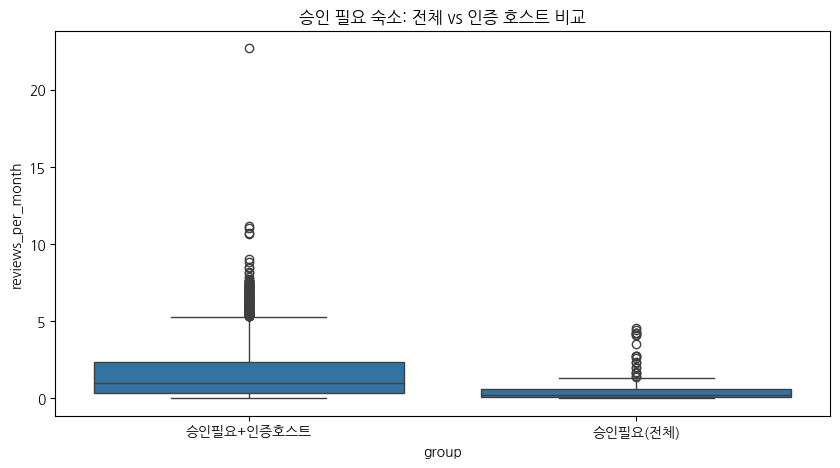

In [ ]:
# 승인 필요 숙소(f) 전체 vs 인증된 호스트의 승인 필요 숙소(f) 비교
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드
df = pd.read_csv("/content/combined_dataset.csv")

# 표준화
def to_bool_like(s):
    return s.astype(str).str.strip().str.lower().isin(["t","true","1","yes","y"])

df["instant_bookable_std"]   = np.where(to_bool_like(df["instant_bookable"]), "t", "f")
df["host_identity_verified"] = to_bool_like(df["host_identity_verified"])

# 승인 필요(f) 숙소만 필터
df_f = df.loc[
    (df["instant_bookable_std"]=="f") &
    (df["reviews_per_month"].notna())
].copy()

# 그룹 정의
df_f["group"] = np.where(df_f["host_identity_verified"],
                         "승인필요+인증호스트",
                         "승인필요(전체)")

# 기술 통계
summary = df_f.groupby("group")["reviews_per_month"].agg(["count","mean","median","std"])
print("=== 승인 필요 숙소 비교 ===")
print(summary.round(4))

# 그룹 분리
g_all = df_f.loc[df_f["group"]=="승인필요(전체)", "reviews_per_month"]
g_verified = df_f.loc[df_f["group"]=="승인필요+인증호스트", "reviews_per_month"]

# Welch t-test
t_stat, p_val = stats.ttest_ind(g_all, g_verified, equal_var=False, nan_policy="omit")
print("\n=== Welch t-test (승인필요 vs 승인필요+인증호스트) ===")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.6f}")

# 효과 크기 계산
def hedges_g(x, y):
    x = np.asarray(x.dropna())
    y = np.asarray(y.dropna())
    nx, ny = len(x), len(y)
    sx2, sy2 = x.var(ddof=1), y.var(ddof=1)
    s_pooled = np.sqrt(((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2))
    d = (x.mean() - y.mean()) / s_pooled
    J = 1 - (3/(4*(nx+ny)-9))
    return d*J

g = hedges_g(g_all, g_verified)
print(f"Hedges' g (|0.2|=작음, |0.5|=중간, |0.8|=큼): {g:.3f}")

# 시각화
plt.figure(figsize=(10,5))
sns.boxplot(data=df_f, x="group", y="reviews_per_month")
plt.title("승인 필요 숙소: 전체 vs 인증 호스트 비교")
plt.ylabel("reviews_per_month")
plt.show()


In [ ]:
import numpy as np

cols_needed = ['host_identity_verified', 'reviews_per_month']
assert all(c in df.columns for c in cols_needed), f"필요 컬럼 누락: {set(cols_needed) - set(df.columns)}"

# 타입/표기 정규화
df['host_identity_verified'] = df['host_identity_verified'].astype(str).str.lower().str.strip()
df['host_identity_verified'] = df['host_identity_verified'].replace({'true':'t','false':'f','1':'t','0':'f'})

# 수치형 변환 + 비정상치 제거
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')
df = df.replace([np.inf, -np.inf], np.nan)

# 필요한 컬럼만 + 결측치 제거
df_sub = df[cols_needed].dropna().copy()

# 기본 분포 확인
print("그룹 수\n", df_sub['host_identity_verified'].value_counts())
print("\n기술통계 (t)")
print(df_sub.loc[df_sub['host_identity_verified']=='t','reviews_per_month'].describe())
print("\n기술통계 (f)")
print(df_sub.loc[df_sub['host_identity_verified']=='f','reviews_per_month'].describe())


그룹 수
 host_identity_verified
t    9669
f     280
Name: count, dtype: int64

기술통계 (t)
count    9669.000000
mean        1.984089
std         1.904041
min         0.010000
25%         0.480000
50%         1.400000
75%         3.000000
max        26.190000
Name: reviews_per_month, dtype: float64

기술통계 (f)
count    280.000000
mean       0.824821
std        1.239394
min        0.010000
25%        0.070000
50%        0.275000
75%        0.932500
max        6.000000
Name: reviews_per_month, dtype: float64


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# 그룹 분리
ver = df_sub.loc[df_sub['host_identity_verified']=='t','reviews_per_month']
nver = df_sub.loc[df_sub['host_identity_verified']=='f','reviews_per_month']

# 로그 변환(왜곡 완화)
df_sub['log_reviews'] = np.log1p(df_sub['reviews_per_month'])
ver_log = df_sub.loc[df_sub['host_identity_verified']=='t','log_reviews']
nver_log = df_sub.loc[df_sub['host_identity_verified']=='f','log_reviews']

# Welch t-test (로그변환 후)
t_stat, p_val = ttest_ind(ver_log, nver_log, equal_var=False, nan_policy='omit')
print(f"Welch's t-test (log): t={t_stat:.3f}, p={p_val:.3e}")

# 보조: Mann–Whitney U (순위비모수)
u_stat, p_u = mannwhitneyu(ver, nver, alternative='two-sided')
print(f"Mann–Whitney U (원스케일): U={u_stat:.0f}, p={p_u:.3e}")

# 차이 방향/크기 요약
print("\n원스케일 평균 비교")
print(f"  verified(t) mean = {ver.mean():.3f} / n={len(ver)}")
print(f"  not verified(f) mean = {nver.mean():.3f} / n={len(nver)}")


Welch's t-test (log): t=15.309, p=1.501e-39
Mann–Whitney U (원스케일): U=2015769, p=2.224e-44

원스케일 평균 비교
  verified(t) mean = 1.984 / n=9669
  not verified(f) mean = 0.825 / n=280


/tmp/ipython-input-3399937850.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


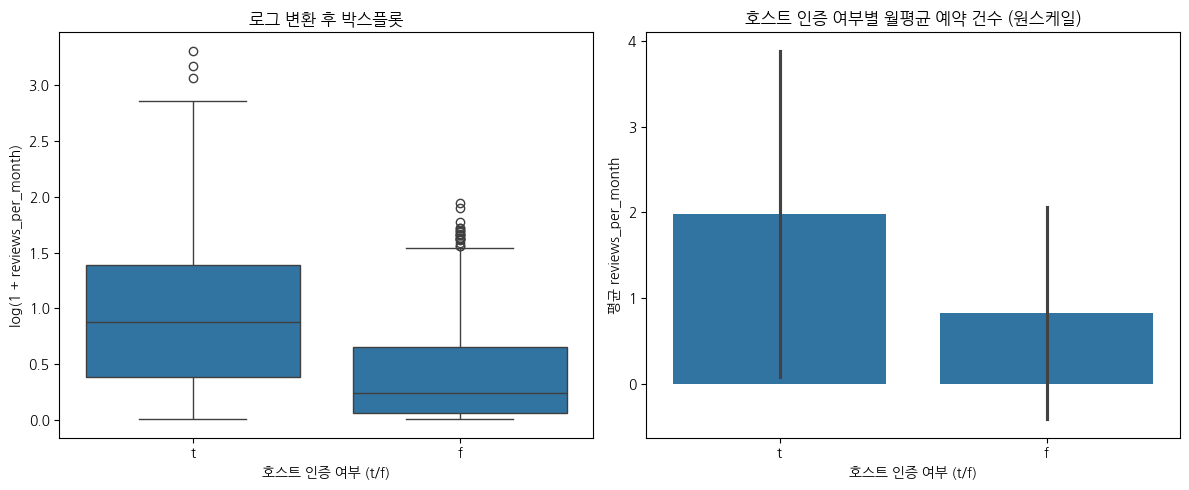

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# (1) 로그 변환 박스플롯
sns.boxplot(
    x='host_identity_verified', y='log_reviews',
    data=df_sub, ax=axes[0]
)
axes[0].set_title("로그 변환 후 박스플롯")
axes[0].set_xlabel("호스트 인증 여부 (t/f)")
axes[0].set_ylabel("log(1 + reviews_per_month)")

# (2) 원스케일 평균 barplot (표준편차 에러바)
sns.barplot(
    x='host_identity_verified', y='reviews_per_month',
    data=df_sub, ci='sd', ax=axes[1]
)
axes[1].set_title("호스트 인증 여부별 월평균 예약 건수 (원스케일)")
axes[1].set_xlabel("호스트 인증 여부 (t/f)")
axes[1].set_ylabel("평균 reviews_per_month")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("/content/combined_dataset.csv")

# 표준화 함수
def to_bool_like(s):
    return s.astype(str).str.strip().str.lower().isin(["t","true","1","yes","y"])

df["instant_bookable_std"]   = np.where(to_bool_like(df["instant_bookable"]), "t", "f")
df["host_identity_verified"] = to_bool_like(df["host_identity_verified"])

# 결측 제거 (reviews_per_month)
df_valid = df[df["reviews_per_month"].notna()].copy()

# 2x2 교차표 (비율)
cross_counts = pd.crosstab(df_valid["instant_bookable_std"], df_valid["host_identity_verified"])
cross_ratio = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

print("=== 교차표: 숙소 수 ===")
print(cross_counts)
print("\n=== 교차표: 비율(%) ===")
print(cross_ratio.round(2))

# 2x2 조합별 reviews_per_month 평균
group_stats = (
    df_valid
    .groupby(["instant_bookable_std","host_identity_verified"])["reviews_per_month"]
    .agg(["count","mean","median","std"])
)
print("\n=== 그룹별 reviews_per_month 통계 ===")
print(group_stats.round(3))


=== 교차표: 숙소 수 ===
host_identity_verified  False  True 
instant_bookable_std                
f                         219   3657
t                          61   6012

=== 교차표: 비율(%) ===
host_identity_verified  False  True 
instant_bookable_std                
f                        5.65  94.35
t                        1.00  99.00

=== 그룹별 reviews_per_month 통계 ===
                                             count   mean  median    std
instant_bookable_std host_identity_verified                             
f                    False                     219  0.544    0.21  0.890
                     True                     3657  1.594    1.00  1.694
t                    False                      61  1.834    1.35  1.716
                     True                     6012  2.222    1.73  1.984


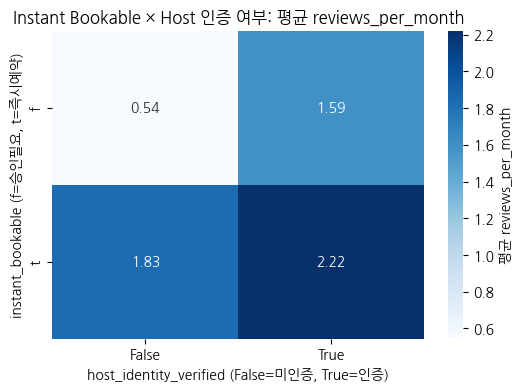

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피벗 테이블: mean 리뷰 수를 행렬로 만들기
pivot_mean = (
    group_stats["mean"]
    .reset_index()
    .pivot(index="instant_bookable_std", columns="host_identity_verified", values="mean")
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot_mean, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': '평균 reviews_per_month'})
plt.title("Instant Bookable × Host 인증 여부: 평균 reviews_per_month")
plt.xlabel("host_identity_verified (False=미인증, True=인증)")
plt.ylabel("instant_bookable (f=승인필요, t=즉시예약)")
plt.show()


# 통계 검증

In [ ]:
from scipy.stats import ttest_ind

verified = df_valid[df_valid['host_identity_verified']]['reviews_per_month']
not_verified = df_valid[~df_valid['host_identity_verified']]['reviews_per_month']

t_stat, p_val = ttest_ind(verified, not_verified, equal_var=False, nan_policy='omit')

print("t-stat:", t_stat)
print("p-value:", p_val)

t-stat: 15.142496751316889
p-value: 2.1642745752629797e-39


In [ ]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

# Groups are already standardized as boolean in df_valid
# Filter using boolean indexing directly
verified = df_valid[df_valid['host_identity_verified']]['reviews_per_month'].dropna()
not_verified = df_valid[~df_valid['host_identity_verified']]['reviews_per_month'].dropna()

# 정규성 검정 (Shapiro-Wilk)
# Check if there are enough samples before sampling
stat_v, p_v = shapiro(verified.sample(min(5000, len(verified)), random_state=42)) if len(verified) > 1 else (np.nan, np.nan) # 데이터가 많으면 일부 샘플링
stat_nv, p_nv = shapiro(not_verified.sample(min(5000, len(not_verified)), random_state=42)) if len(not_verified) > 1 else (np.nan, np.nan) # 데이터가 많으면 일부 샘플링


print("Verified 정규성 p-value:", p_v)
print("Not Verified 정규성 p-value:", p_nv)

# p > 0.05 → 정규성 만족, p < 0.05 → 정규성 위배
# Check for NaN p-values which indicate insufficient samples for Shapiro-Wilk
if (p_v > 0.05 or np.isnan(p_v)) and (p_nv > 0.05 or np.isnan(p_nv)):
    # 정규성 만족 또는 샘플 부족 → Welch’s t-test
    t_stat, p_val = ttest_ind(verified, not_verified, equal_var=False)
    print("Welch’s t-test 결과:", t_stat, p_val)
else:
    # 정규성 불만족 → Mann-Whitney U test
    u_stat, p_val = mannwhitneyu(verified, not_verified, alternative='two-sided')
    print("Mann-Whitney U test 결과:", u_stat, p_val)

Verified 정규성 p-value: 3.7930358249566702e-56
Not Verified 정규성 p-value: 5.44554456589684e-23
Mann-Whitney U test 결과: 2015769.0 2.2243005599063911e-44


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# 1. 평균/중앙값 비교
print("=== 전체 데이터 평균·중앙값 비교 ===")
print("Verified 평균:", verified.mean(), "중앙값:", verified.median())
print("Not Verified 평균:", not_verified.mean(), "중앙값:", not_verified.median())

# 2. 다운샘플링 (인증된 그룹에서 미인증 그룹 수만큼 무작위 추출)
np.random.seed(42)
sampled_verified = verified.sample(len(not_verified), random_state=42)

# 3. 다운샘플링 후 평균/중앙값 비교
print("\n=== 다운샘플링 후 평균·중앙값 비교 ===")
print("Verified(샘플) 평균:", sampled_verified.mean(), "중앙값:", sampled_verified.median())
print("Not Verified 평균:", not_verified.mean(), "중앙값:", not_verified.median())

# 4. 다운샘플링 후 Mann-Whitney U test
u_stat, p_val = mannwhitneyu(sampled_verified, not_verified, alternative='two-sided')
print("\n=== 다운샘플링 후 Mann-Whitney U test ===")
print("U 통계량:", u_stat, "p-value:", p_val)


=== 전체 데이터 평균·중앙값 비교 ===
Verified 평균: 1.9840893577412348 중앙값: 1.4
Not Verified 평균: 0.8248214285714285 중앙값: 0.275

=== 다운샘플링 후 평균·중앙값 비교 ===
Verified(샘플) 평균: 1.9081071428571428 중앙값: 1.25
Not Verified 평균: 0.8248214285714285 중앙값: 0.275

=== 다운샘플링 후 Mann-Whitney U test ===
U 통계량: 57248.0 p-value: 4.1937644355574626e-21
